In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#For ignoring warning
import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv("survey lung cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


# Note: In this dataset, YES=2 & NO=1

In [3]:
df.shape

(309, 16)

In [4]:
#Checking for Duplicates
df.duplicated().sum()

33

In [5]:
#Removing Duplicates
df=df.drop_duplicates()


In [6]:
#Checking for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

In [8]:
df.head()
X = df.loc[:, df.columns != 'LUNG_CANCER']
y = df['LUNG_CANCER']

In [9]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


#### In this dataset, GENDER & LUNG_CANCER attributes are in object data type. So, let's convert them to numerical values using LabelEncoder from sklearn. LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Also let's make every other attributes as YES=1 & NO=0.

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [11]:
#Let's check what's happened now
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


# Note: Male=1 & Female=0. Also for other variables, YES=1 & NO=0

In [12]:
X.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
dtype: object

# Getting insight of each attribute of the data

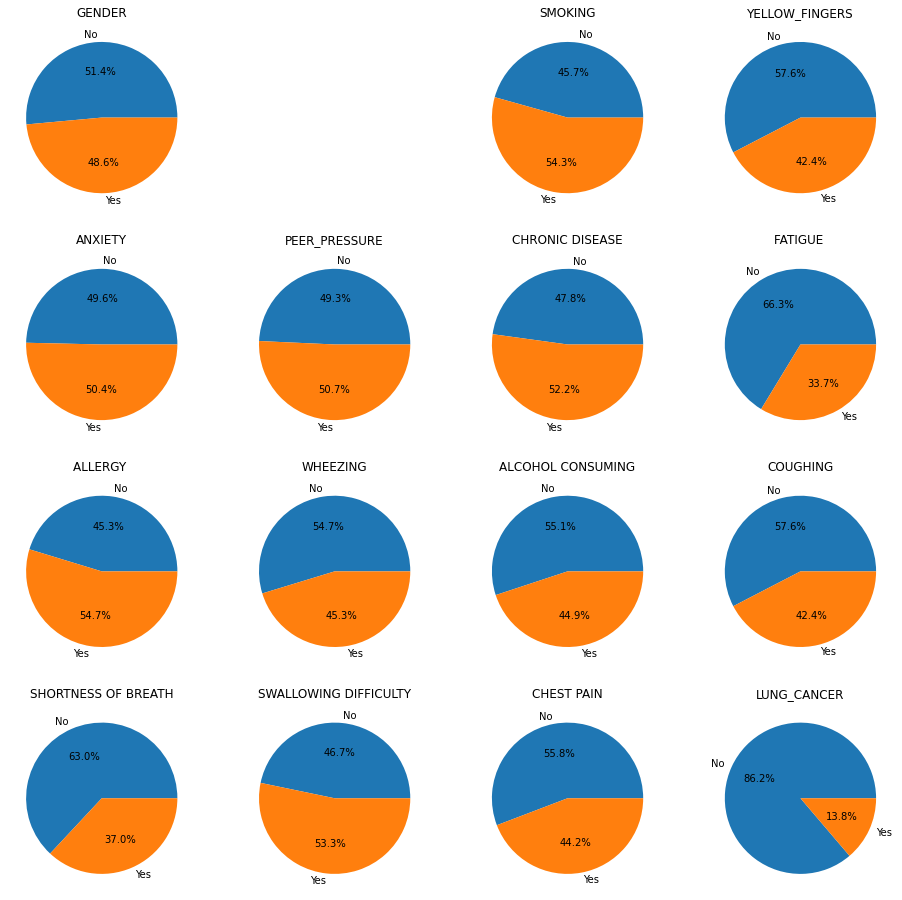

In [13]:
plt.figure(figsize=(16,16))
for i in range(0,len(df.columns)):
    if i==1:
        continue
    else:
        plt.subplot(4,4,i+1)
        plt.title("{0}".format(df.columns[i]))
        plt.pie(df.iloc[:,i].value_counts(sort=False),labels=['No','Yes'],autopct='%.1f%%')

<AxesSubplot:xlabel='AGE', ylabel='Density'>

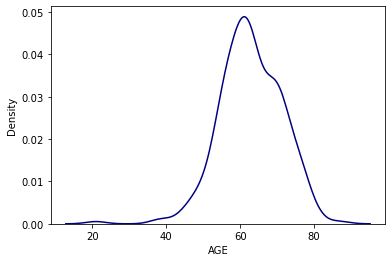

In [14]:
sns.kdeplot(df['AGE'],color='navy')

# Let's check the distributaion of Target variable.


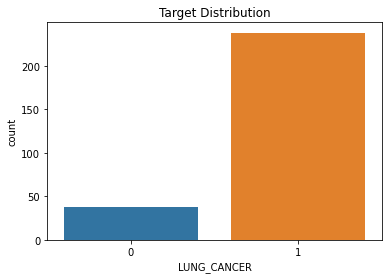

In [15]:
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

# That is, Target Distribution is imbalanced.

In [16]:
df['LUNG_CANCER'].value_counts()

1    238
0     38
Name: LUNG_CANCER, dtype: int64

### let me handle this imbalance before applying algorithm.

# 

### Now let's do some Data Visualizations for the better understanding of how the independent features are related to the target variable..

In [17]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))


<AxesSubplot:xlabel='GENDER'>

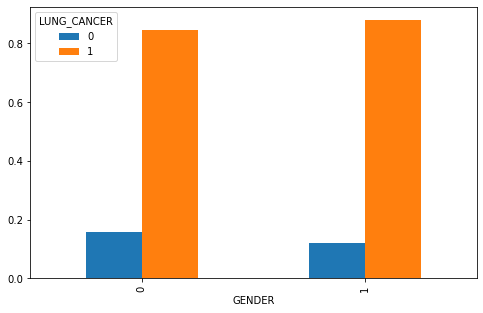

In [18]:
plot('GENDER')

<AxesSubplot:xlabel='AGE'>

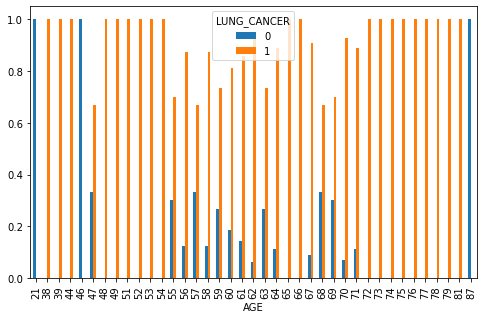

In [19]:
plot('AGE')

<AxesSubplot:xlabel='SMOKING'>

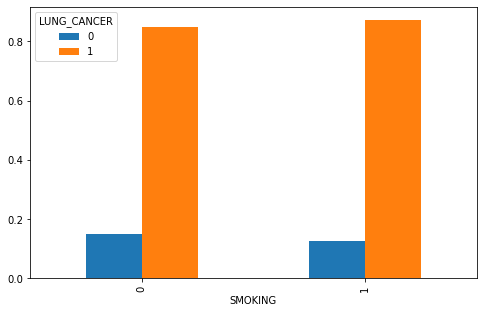

In [20]:
plot('SMOKING')

<AxesSubplot:xlabel='YELLOW_FINGERS'>

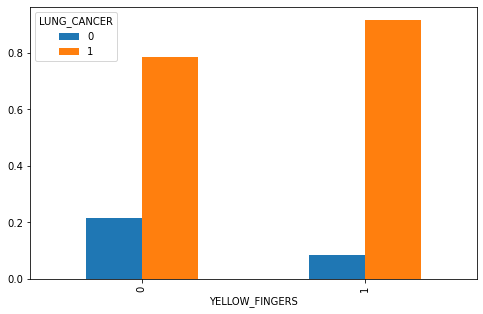

In [21]:
plot('YELLOW_FINGERS')

<AxesSubplot:xlabel='ANXIETY'>

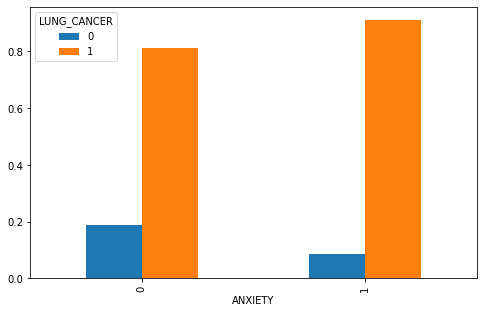

In [22]:
plot('ANXIETY')

<AxesSubplot:xlabel='PEER_PRESSURE'>

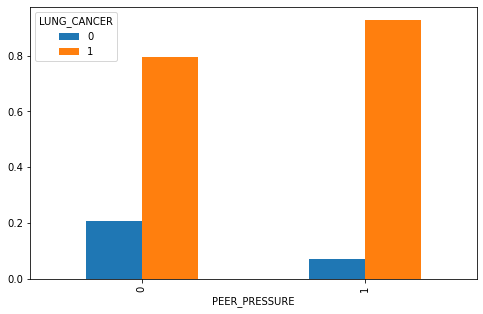

In [23]:
plot('PEER_PRESSURE')

<AxesSubplot:xlabel='CHRONIC DISEASE'>

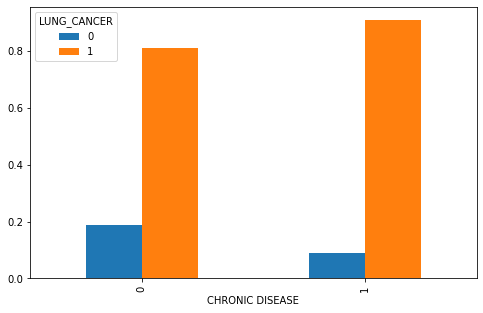

In [24]:
plot('CHRONIC DISEASE')

<AxesSubplot:xlabel='FATIGUE '>

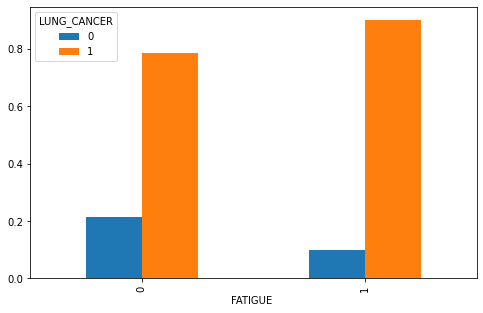

In [25]:
plot('FATIGUE ')

<AxesSubplot:xlabel='ALLERGY '>

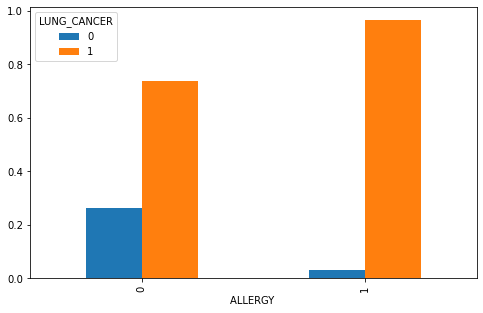

In [26]:
plot('ALLERGY ')

<AxesSubplot:xlabel='WHEEZING'>

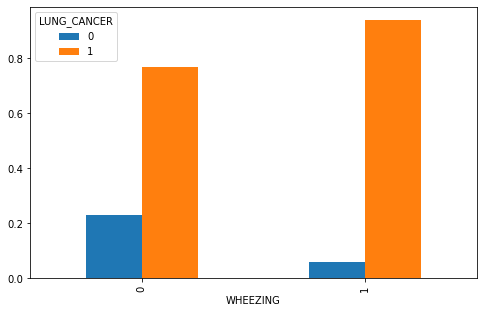

In [27]:
plot('WHEEZING')

<AxesSubplot:xlabel='ALCOHOL CONSUMING'>

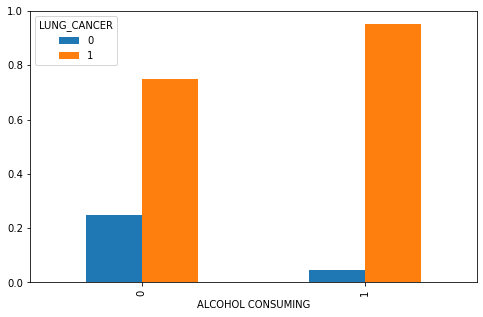

In [28]:
plot('ALCOHOL CONSUMING')

<AxesSubplot:xlabel='COUGHING'>

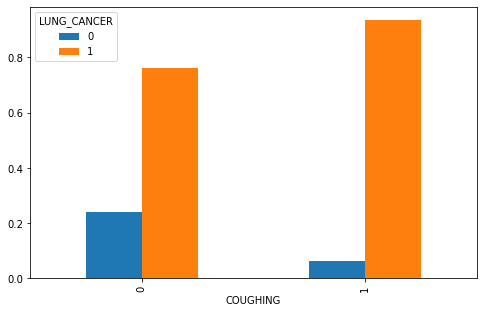

In [29]:
plot('COUGHING')

<AxesSubplot:xlabel='SHORTNESS OF BREATH'>

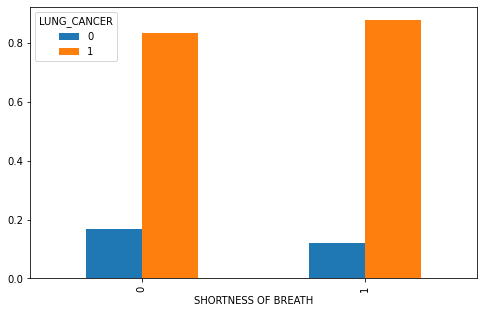

In [30]:
plot('SHORTNESS OF BREATH')

<AxesSubplot:xlabel='SWALLOWING DIFFICULTY'>

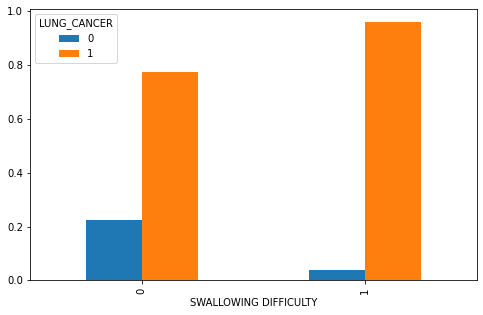

In [31]:
plot('SWALLOWING DIFFICULTY')

<AxesSubplot:xlabel='CHEST PAIN'>

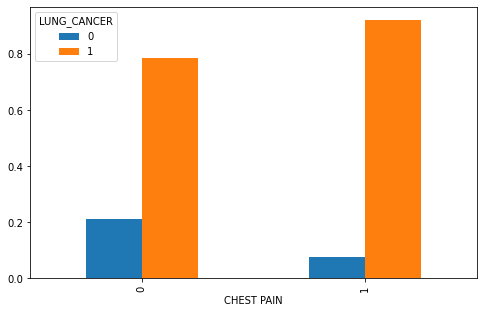

In [32]:
plot('CHEST PAIN')

#### From the visualizations, it is clear that in the given dataset, the features GENDER, AGE and SHORTNESS OF BREATH don't have that much relationship with LUNG CANCER. So let's drop those features to make this dataset more clean.

In [33]:
df_new=df.drop(columns=['GENDER','AGE', 'SHORTNESS OF BREATH'])
df_new

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,1,0,0,0,0,0,1,0,1,1,0
4,0,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,1,1,1,0,0,1,1,0,1,1,0,1
280,1,0,0,0,1,1,1,0,0,0,0,0,0
281,1,0,0,0,0,1,1,0,0,0,0,1,0
282,0,1,1,0,0,0,0,0,0,0,1,1,0


### Deciding on algorithm to use. either Decision tree or Random forest Bassed on accurancy as evaluated below

In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,RocCurveDisplay,confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split,GridSearchCV

In [35]:
one_hot_encoded_X = pd.get_dummies(df_new)
one_hot_encoded_X.head()

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,1,0,0,0,0,0,1,0,1,1,0
4,0,1,0,0,0,0,0,1,0,1,0,0,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_X, y, random_state=42)


In [37]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
#svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
#plt.show()

SVC(random_state=42)

In [38]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
#rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

RandomForestClassifier(n_estimators=10, random_state=42)

In [39]:
dtc = DecisionTreeClassifier(max_depth = 12)
dtc.fit(X_train, y_train)
#dtc_disp = RocCurveDisplay.from_estimator(dtc, X_test, y_test)

DecisionTreeClassifier(max_depth=12)

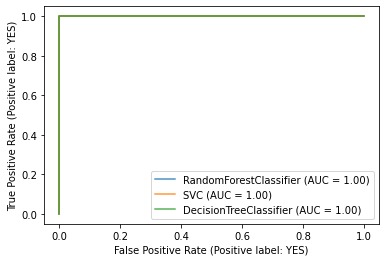

In [40]:

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test,ax=ax,alpha=0.8)
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test,ax=ax,alpha=0.8)
dtc_disp = RocCurveDisplay.from_estimator(dtc, X_test, y_test,ax=ax,alpha=0.8)
plt.show()

In [41]:
rf_model = RandomForestClassifier()
rf_parameters = {"max_depth": [10,13],
                 "n_estimators": [10,100,500],
                 "min_samples_split": [2,5]}
rf_cv_model = GridSearchCV(rf_model,
                           rf_parameters,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 13], 'min_samples_split': [2, 5],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

In [42]:
print('Best parameters: ' + str(rf_cv_model.best_params_))

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10}


In [43]:
def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    #print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      #.format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))

In [44]:
rf_tuned = RandomForestClassifier(max_depth = 10,
                                  min_samples_split = 5,
                                  n_estimators = 100)

print('Model: Random Forest Tuned\n')
model(rf_tuned, X_train, X_test, y_train, y_test)

Model: Random Forest Tuned



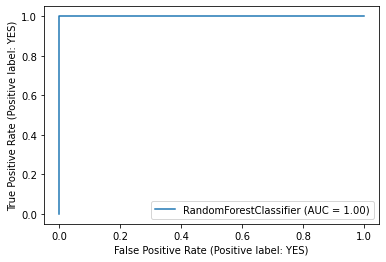

In [45]:
rfc_tuned_disp = RocCurveDisplay.from_estimator(rf_tuned, X_test, y_test)

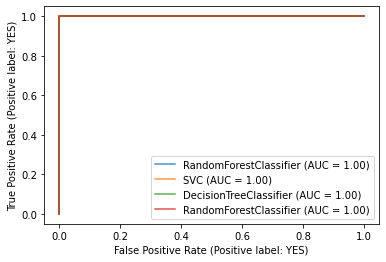

In [46]:
ax = plt.gca()
rfc_disp.plot(ax=ax, alpha=0.8) 
svc_disp.plot(ax=ax, alpha=0.8)
dtc_disp.plot(ax=ax, alpha=0.8)
rfc_tuned_disp.plot(ax=ax , alpha=0.8)
plt.show()

### check f1_score,precision and etc for the best model selection

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_preds_rfc_tuned = rf_tuned.predict(X_test)
cm_rfc_tuned = confusion_matrix(y_test, y_preds_rfc_tuned)
precision_rfc_tuned = precision_score(y_test, y_preds_rfc_tuned, average='macro')
recall_rfc_tuned = recall_score(y_test, y_preds_rfc_tuned, average='macro')
f1_rfc_tuned = f1_score(y_test, y_preds_rfc_tuned, average='macro')

y_preds_rfc = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_preds_rfc)
precision_rfc = precision_score(y_test, y_preds_rfc, average='macro')
recall_rfc = recall_score(y_test, y_preds_rfc, average='macro')
f1_rfc = f1_score(y_test, y_preds_rfc, average='macro')


y_preds_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_preds_dtc)
precision_dtc = precision_score(y_test, y_preds_dtc, average='macro')
recall_dtc = recall_score(y_test, y_preds_dtc, average='macro')
f1_dtc = f1_score(y_test, y_preds_dtc, average='macro')

y_preds_svc = svc.predict(X_test)
cm_svc = confusion_matrix(y_test, y_preds_svc)
precision_svc = precision_score(y_test, y_preds_svc, average='macro')
recall_svc = recall_score(y_test, y_preds_svc, average='macro')
f1_svc = f1_score(y_test, y_preds_svc, average='macro')

print("Random Forest Tuned\n",cm_rfc_tuned,"\nPrecision: ",precision_rfc_tuned
     ,"\nRecall:",recall_rfc_tuned,"\nF1-Score",f1_rfc_tuned,"\n")
print("Random Forest\n",cm_rfc,"\nPrecision: ",precision_rfc
     ,"\nRecall:",recall_rfc,"\nF1-Score",f1_rfc,"\n")
print("Decision Tree\n",cm_dtc,"\nPrecision: ",precision_dtc
     ,"\nRecall:",recall_dtc,"\nF1-Score",f1_dtc,"\n")
print("Suppor Vector Machines\n",cm_svc,"\nPrecision: ",precision_svc
     ,"\nRecall:",recall_svc,"\nF1-Score",f1_svc,"\n")

Random Forest Tuned
 [[13  0]
 [ 0 56]] 
Precision:  1.0 
Recall: 1.0 
F1-Score 1.0 

Random Forest
 [[13  0]
 [ 0 56]] 
Precision:  1.0 
Recall: 1.0 
F1-Score 1.0 

Decision Tree
 [[13  0]
 [ 0 56]] 
Precision:  1.0 
Recall: 1.0 
F1-Score 1.0 

Suppor Vector Machines
 [[13  0]
 [ 0 56]] 
Precision:  1.0 
Recall: 1.0 
F1-Score 1.0 



In [48]:
# Printing accuracy score for Random Forest Algorithm

In [49]:
print(f"Accuracy is {round(accuracy_score(y_test, rfc.predict(X_test))*100,2)}")

Accuracy is 100.0


In [50]:
# Printing accuracy score for Decision Tree Algorithm

In [51]:
print(f"Accuracy is {round(accuracy_score(y_test, dtc.predict(X_test))*100,2)}")

Accuracy is 100.0


### From the 2 models we can see that both have the same accurancy equaling to 100. I will prefer dtc for now

In [52]:
# save model
import pickle
with open('modell.pkl','wb') as f:
    pickle.dump(dtc,f)